<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 52686 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52686 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


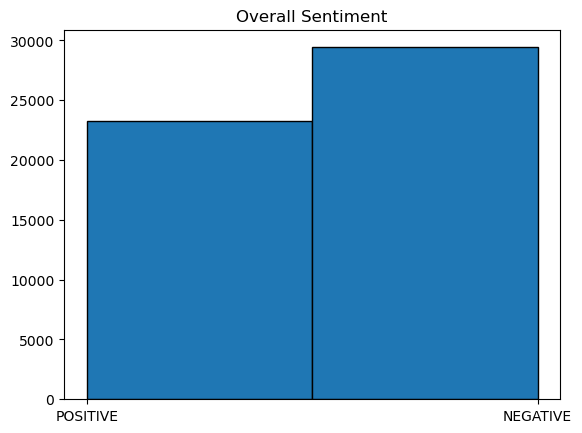

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...


[('app', 29632), ('music', 21397), ('spotify', 15327), ('songs', 14488), ('song', 12078), ('play', 9400), ('like', 7991), ('good', 7803), ('love', 7758), ('listen', 7411), ('premium', 7003), ('ads', 6743), ('great', 6206), ('playlist', 5654), ('even', 5382), ('playing', 5331), ('want', 4948), ('use', 4802), ('get', 4574), ('update', 4453)]


,Review,label,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
0,great music service the audio is high quality ...,POSITIVE,"[great, music, service, the, audio, is, high, ...","[great, music, service, audio, high, quality, ...","[great, music, service, audio, high, quality, ...",great music service audio high quality app eas...
1,please ignore previous negative rating this ap...,POSITIVE,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, a...","[please, ignore, previous, negative, rat, app,...",please ignore previous negative rat app super ...
2,this pop up get the best spotify experience on...,NEGATIVE,"[this, pop, up, get, the, best, spotify, exper...","[pop, get, best, spotify, experience, android,...","[pop, get, best, spotify, experience, android,...",pop get best spotify experience android annoy ...
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of...","[really, buggy, terrible, use, recently]","[really, buggy, terrible, use, recently]",really buggy terrible use recently
4,dear spotify why do i get songs that i didn t ...,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, ...","[dear, spotify, get, songs, put, playlist, shu...","[dear, spotify, get, songs, put, playlist, shu...",dear spotify get songs put playlist shuffle play
5,the player controls sometimes disappear for no...,NEGATIVE,"[the, player, controls, sometimes, disappear, ...","[player, controls, sometimes, disappear, reaso...","[player, control, sometimes, disappear, reason...",player control sometimes disappear reason app ...
6,i love the selection and the lyrics are provid...,POSITIVE,"[i, love, the, selection, and, the, lyrics, ar...","[love, selection, lyrics, provided, song, list...","[love, selection, lyric, provide, song, listen]",love selection lyric provide song listen
7,still extremely slow when changing storage to ...,NEGATIVE,"[still, extremely, slow, when, changing, stora...","[still, extremely, slow, changing, storage, ex...","[still, extremely, slow, change, storage, exte...",still extremely slow change storage external s...
8,it s a great app and the best mp music app i h...,POSITIVE,"[it, s, a, great, app, and, the, best, mp, mus...","[great, app, best, mp, music, app, ever, used,...","[great, app, best, mp, music, app, ever, use, ...",great app best mp music app ever use one probl...
9,i m deleting this app for the following reason...,NEGATIVE,"[i, m, deleting, this, app, for, the, followin...","[deleting, app, following, reasons, app, faili...","[delete, app, follow, reason, app, fail, busin...",delete app follow reason app fail business mod...


In [8]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#Loading The Dataset
df = pd.read_csv('SpotifyReviewsData.csv')

#Seeing The Data
df.head(10)

#Basic EDA
df.info()

#Identifying Null Reviews
df.isnull().sum()

#Removing Null Reviews
df = df.dropna(subset=['Review'])
df.info()

#Showing The Overall Sentiment
x = df['label']
plt.hist(x, bins=2, edgecolor='black')
plt.title("Overall Sentiment")
plt.show()

#Removing Stop Words
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Review'] = df['Review'].apply(clean_text)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

def tokenize_text(text):
    tokens = word_tokenize(text) 
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(20)
print(most_common_words_after_removal)

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)